In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
from wordcloud import WordCloud

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd


In [ ]:
df_accidents_orig = pd.read_csv("Datasets/AccidentesAviones.csv", encoding="utf-8")

In [ ]:
df_accidents_orig.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [ ]:
df_accidents_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [ ]:
df_acci_copy = df_accidents_orig.copy()

In [ ]:
df_acci_copy.drop(["Unnamed: 0"], axis= 1, inplace=True) # Dropeamos la lumna unnamed
df_acci_copy.head() 

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Fecha - Fecha del accidente

Hora Declarada - Hora local declarada del accidente, formato 24 horas HHMM

Ruta - Trayecto del avión

Operator - Airline or operator of the aircraft

Flight - Flight number assigned by the aircraft operator

Route - Complete or partial route flown prior to the accident

Type - Aircraft type

Registration - ICAO registration of the aircraft

cn/In - Construction or serial number / Line or fuselage number

Total Aboard - Total people aboard

Passengers Aboard - Passengers aboard

Crew Aboard - Crew aboard

Total Fatalities - Total fatalities

Passengers Fatalities - Passengers fatalities

Crew Fatalities - Crew fatalities

Ground - Total killed on the ground

Summary - Brief description of the accident and cause if known

Observamos que en lugar de valores nulos o vacios en el Dataframe, se encuentran signos de cierre de interrogación "?", vamos a remplazarlos para poder analizar valores nulos o faltantes.

In [ ]:
df_acci_copy = df_acci_copy.rename(columns={'fecha': 'Fecha', 'HORA declarada': 'Hora Declarada', "Ruta":"Ubicación", "OperadOR": "Operador", "flight_no":"No. Vuelo", "route":"Ruta", 
                                            "ac_type":"Tipo Avión", "registration":"Registro", "cn_ln": "No. Serie/Fuselaje", "all_aboard": "Total Personas a Bordo", 
                                            "PASAJEROS A BORDO":"Pasajeros a Bordo", "crew_aboard":"Tripulación a Bordo", "cantidad de fallecidos": "Cantidad Fallecidos", 
                                             "passenger_fatalities":"Pasajeros Fallecidos", "crew_fatalities":"Tripulación Fallecida", "ground": "Muertos en Tierra", 
                                             "summary":"Resumen"  }) # Renombramos columnas

In [ ]:
# Sustituir signos de interrogacion por vacios.

df_acci_copy = df_acci_copy.replace('?', np.nan)

In [ ]:
df_acci_copy.head()

,Fecha,Hora Declarada,Ubicación,Operador,No. Vuelo,Ruta,Tipo Avión,Registro,No. Serie/Fuselaje,Total Personas a Bordo,Pasajeros a Bordo,Tripulación a Bordo,Cantidad Fallecidos,Pasajeros Fallecidos,Tripulación Fallecida,Muertos en Tierra,Resumen
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [ ]:
df_acci_copy.isnull().sum()

Fecha                        0
Hora Declarada            1504
Ubicación                    5
Operador                    10
No. Vuelo                 3682
Ruta                       762
Tipo Avión                  13
Registro                   272
No. Serie/Fuselaje         667
Total Personas a Bordo      17
Pasajeros a Bordo          221
Tripulación a Bordo        219
Cantidad Fallecidos          8
Pasajeros Fallecidos       235
Tripulación Fallecida      235
Muertos en Tierra           44
Resumen                     59
dtype: int64

Manipulación de Datos

In [ ]:
df_acci_copy = df_acci_copy.dropna(subset=['Operador']) 
df_acci_copy = df_acci_copy.dropna(subset=['Total Personas a Bordo']) 
df_acci_copy = df_acci_copy.dropna(subset=['Cantidad Fallecidos']) # Eliminamos algunos datos vacios

In [ ]:
try:
    df_acci_copy = df_acci_copy.drop(["No. Vuelo", "No. Serie/Fuselaje"], axis=1) # Eliminamos esta columna debido a que no representa o agrega valor a nuestro analisis, al estar practicamente vacia.
except:
    print("Ya se elimino la columna")

In [ ]:
# Se creara una nueva columna con la fecha para que este en formato AAAA-MMM-DDD

def convertir_fecha(fecha):
    fecha_datetime = datetime.strptime(fecha, "%B %d, %Y")
    fecha_formateada = fecha_datetime.strftime("%Y-%m-%d")
    return fecha_formateada

In [ ]:
df_acci_copy['Nueva Fecha'] = df_acci_copy['Fecha'].apply(convertir_fecha)

In [ ]:
df_acci_copy.head()

,Fecha,Hora Declarada,Ubicación,Operador,Ruta,Tipo Avión,Registro,Total Personas a Bordo,Pasajeros a Bordo,Tripulación a Bordo,Cantidad Fallecidos,Pasajeros Fallecidos,Tripulación Fallecida,Muertos en Tierra,Resumen,Nueva Fecha
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908-09-17
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912-07-12
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913-08-06
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913-09-09
5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,28,NaN,NaN,28,NaN,NaN,0,Hydrogen gas which was being vented was sucked...,1913-10-17


In [ ]:
# Remplazar valores faltantes en HORA declarada, se remplazan por 00:00.

df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].replace(np.nan, '0000') 
df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].str.replace('c: ', '')
df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].str.replace('c:', '')
df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].str.replace('c', '')
df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].str.replace('Z', '')
df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].str.replace(';', '')
df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].str.replace(':', '')


In [ ]:
def formatear_hora(hora):   # Generamos una funcion para tranformar la hora en formato 00:00.
    if len(hora) == 1:
        return f"00:0{hora}"
    elif len(hora) == 2:
        return f"00:{hora}"
    elif len(hora) == 3:
        if int(hora[1:])>60:
            return f"{hora[:2]}:{hora[2:]}0"
        else:
            return f"0{hora[:1]}:{hora[1:]}"
    elif len(hora) == 4:
        return f"{hora[:2]}:{hora[2:]}"
    else:
        return hora

In [ ]:
df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].astype(str) # Cambiamos el tipo a string.

df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].str.strip() # Eliminamos espacios a la derecha o izquierda.

df_acci_copy['Hora Declarada'] = df_acci_copy['Hora Declarada'].apply(formatear_hora)# Se aplica la funcion a la columna "Hora Declarada"

In [ ]:
df_acci_copy['Hora Declarada']

0       17:18
2       06:30
3       00:00
4       18:30
5       10:30
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: Hora Declarada, Length: 4981, dtype: object

In [ ]:
df_acci_copy['Tiempo'] = df_acci_copy['Nueva Fecha'] + ' ' + df_acci_copy['Hora Declarada'] # Unimos las dos columnas de fecha y hora en una sola

In [ ]:
df_acci_copy['Tiempo'] = pd.to_datetime(df_acci_copy['Tiempo'], format='%Y-%m-%d %H:%M') # Convertimos la columna a formato datetime

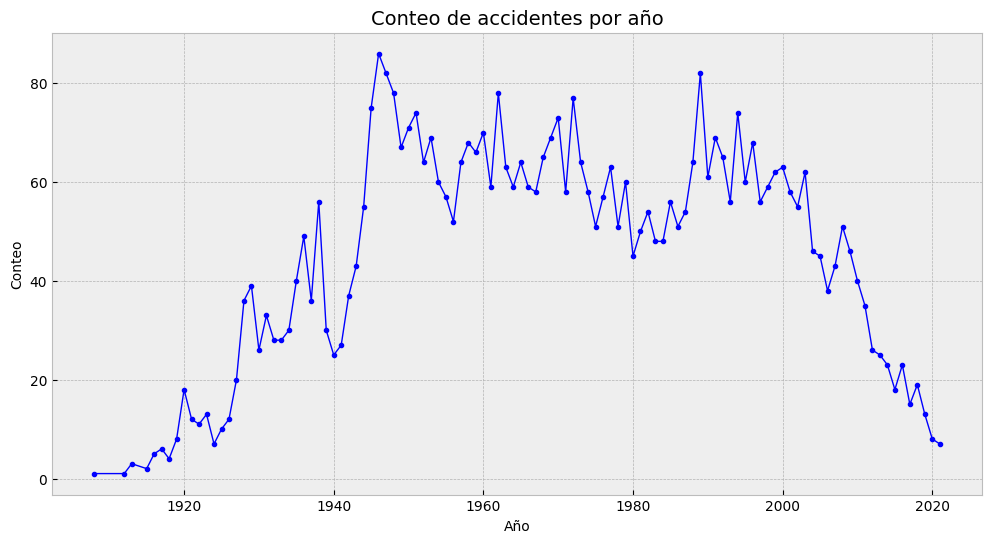

In [ ]:
conteo_accidentes = df_acci_copy.groupby(df_acci_copy.Tiempo.dt.year)[['Fecha']].count() #Temp is going to be temporary data frame 
conteo_accidentes = conteo_accidentes.rename(columns={"Fecha": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(conteo_accidentes.index, 'Count', data=conteo_accidentes, color='blue', marker = ".", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Conteo', fontsize=10)
plt.title('Conteo de accidentes por año', loc='Center', fontsize=14)
plt.show()

C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\4259840612.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')
C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\4259840612.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


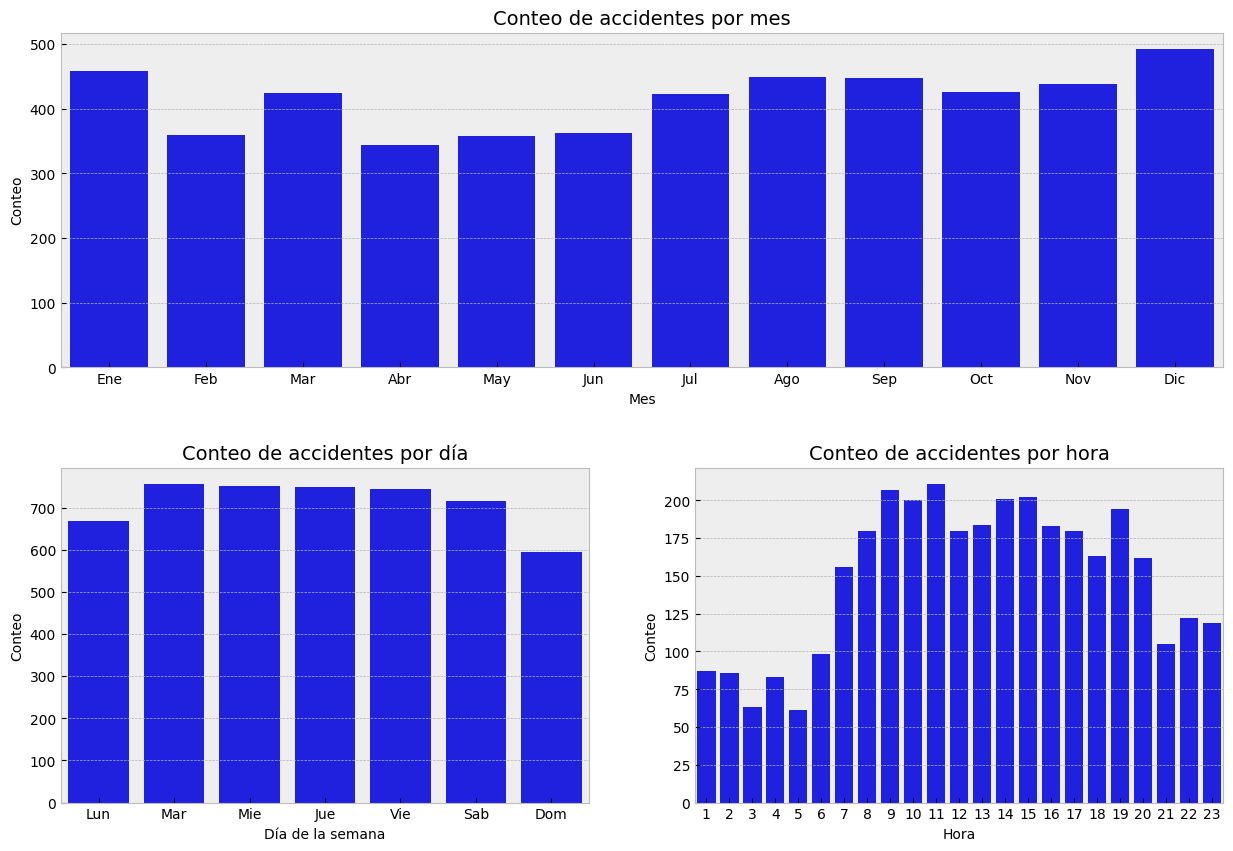

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.style.use('seaborn-muted')
gs = fig.add_gridspec(2, 2, hspace=0.5)

ax1 = fig.add_subplot(gs[0, :])  
sns.barplot(x=df_acci_copy.groupby(df_acci_copy.Tiempo.dt.month)['Fecha'].count().index,
            y=df_acci_copy.groupby(df_acci_copy.Tiempo.dt.month)['Fecha'].count(),
            color='blue', linewidth=2, ax=ax1)
ax1.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax1.set_xlabel('Mes', fontsize=10)
ax1.set_ylabel('Conteo', fontsize=10)
ax1.set_title('Conteo de accidentes por mes', loc='center', fontsize=14)

ax2 = fig.add_subplot(gs[1, 0])  
sns.barplot(x=df_acci_copy.groupby(df_acci_copy.Tiempo.dt.weekday)['Fecha'].count().index,
            y=df_acci_copy.groupby(df_acci_copy.Tiempo.dt.weekday)['Fecha'].count(),
            color='blue', linewidth=2, ax=ax2)
ax2.set_xticklabels(['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'])
ax2.set_xlabel('Día de la semana', fontsize=10)
ax2.set_ylabel('Conteo', fontsize=10)
ax2.set_title('Conteo de accidentes por día', loc='center', fontsize=14)

ax3 = fig.add_subplot(gs[1, 1])  
sns.barplot(x=df_acci_copy[df_acci_copy.Tiempo.dt.hour != 0].groupby(df_acci_copy.Tiempo.dt.hour)['Fecha'].count().index,
            y=df_acci_copy[df_acci_copy.Tiempo.dt.hour != 0].groupby(df_acci_copy.Tiempo.dt.hour)['Fecha'].count(),
            color='blue', linewidth=2, ax=ax3)
ax3.set_xlabel('Hora', fontsize=10)
ax3.set_ylabel('Conteo', fontsize=10)
ax3.set_title('Conteo de accidentes por hora', loc='center', fontsize=14)

# Ajustar el espaciado vertical para centrar la última figura
gs.update(hspace=0.3)

plt.tight_layout()
plt.show()


In [ ]:
type_freq

Training                      96
Sightseeing                   31
Test flight                   23
Sao Paulo - Rio de Janeiro     7
Rio de Janeiro - Sao Paulo     5
Test                           5
Sao Paulo - Porto Alegre       4
Tallinn - Helsinki             4
Barranquilla - Bogota          4
Paris - London                 4
Villavicencio - Mitu           4
Demonstration                  4
Bogota - Barranquilla          4
Huambo - Luanda                4
Croydon - Paris                4
Name: Ruta, dtype: int64

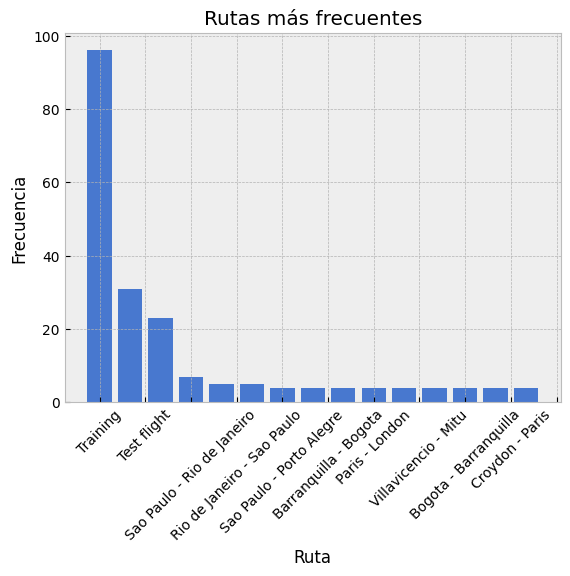

In [ ]:
freq = df_acci_copy['Ruta'].value_counts()

# Obtiene los tipos más frecuentes
type_freq = freq.head(15)

# Grafica los tipos más frecuentes
fig, ax = plt.subplots()

ax.bar(type_freq.index, type_freq.values)
ax.set_xlabel('Ruta')
ax.set_ylabel('Frecuencia')
ax.set_title('Rutas más frecuentes')

# Ajuste automático de etiquetas en el eje x
ax.xaxis.set_major_locator(ticker.MaxNLocator(len(type_freq.index)))

# Rotación de las etiquetas para mayor legibilidad
plt.xticks(rotation=45)

plt.show()

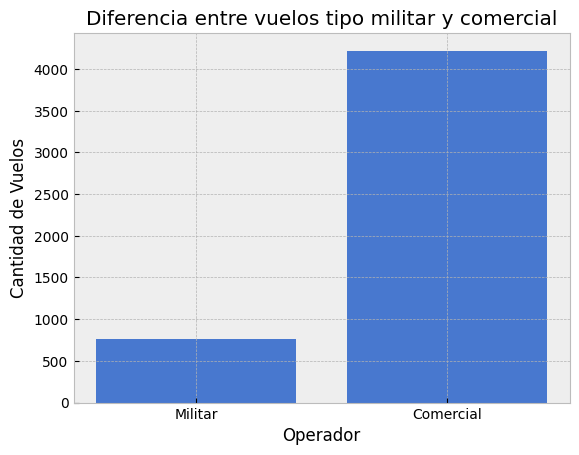

In [ ]:
# Calcula la cantidad de vuelos de cada tipo de operador
count_tipe_ope = df_acci_copy["Operador"].value_counts()

# Filtra los tipos de operador que contienen "Military"
military = count_tipe_ope[count_tipe_ope.index.str.contains('Military')]

# Calcula la cantidad de vuelos comerciales
comerciales = count_tipe_ope.sum() - military.sum()

# Crea una lista con los nombres de los tipos de operador
types = ['Militar', 'Comercial']

# Crea una lista con los conteos correspondientes
counts = [military.sum(), comerciales]

# Grafica los vuelos de tipo "Military" y los vuelos comerciales
plt.bar(types, counts)
plt.xlabel('Operador')
plt.ylabel('Cantidad de Vuelos')
plt.title('Diferencia entre vuelos tipo militar y comercial')
plt.show()

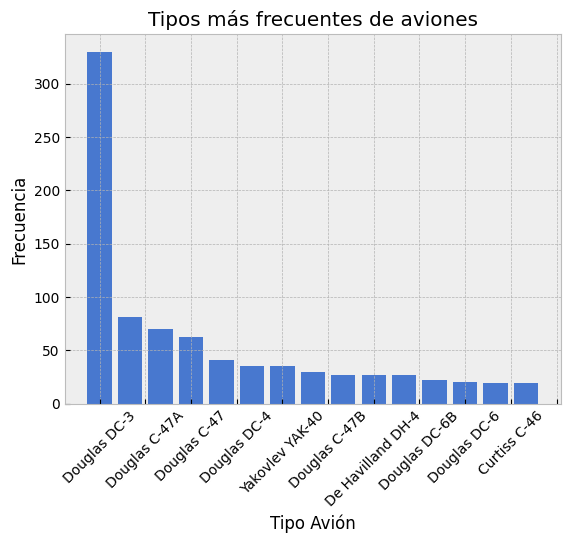

In [ ]:
freq_tipe_plane = df_acci_copy['Tipo Avión'].value_counts()

# Obtiene los tipos más frecuentes
type_freq_plane = freq_tipe_plane.head(15)

# Grafica los tipos más frecuentes
fig, ax = plt.subplots()

ax.bar(type_freq_plane.index, type_freq_plane.values)
ax.set_xlabel('Tipo Avión')
ax.set_ylabel('Frecuencia')
ax.set_title('Tipos más frecuentes de aviones')

# Ajuste automático de etiquetas en el eje x
ax.xaxis.set_major_locator(ticker.MaxNLocator(len(type_freq.index)))

# Rotación de las etiquetas para mayor legibilidad
plt.xticks(rotation=45)

plt.show()

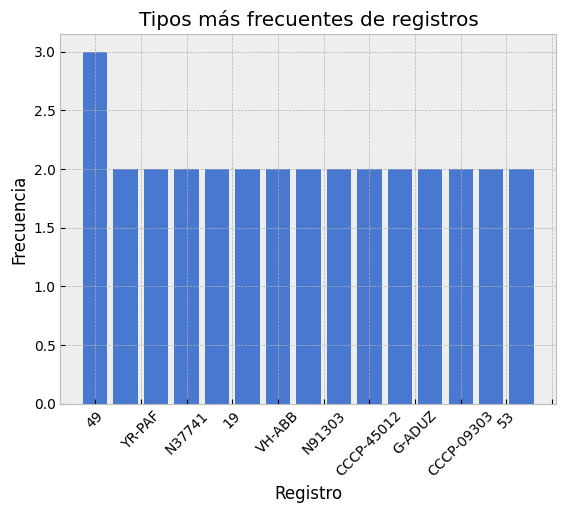

In [ ]:
freq_tipe_reg = df_acci_copy['Registro'].value_counts()

# Obtiene los tipos más frecuentes
type_freq_reg = freq_tipe_reg.head(15)

# Grafica los tipos más frecuentes
fig, ax = plt.subplots()

ax.bar(type_freq_reg.index, type_freq_reg.values)
ax.set_xlabel('Registro')
ax.set_ylabel('Frecuencia')
ax.set_title('Tipos más frecuentes de registros')

# Ajuste automático de etiquetas en el eje x
ax.xaxis.set_major_locator(ticker.MaxNLocator(len(type_freq.index)))

# Rotación de las etiquetas para mayor legibilidad
plt.xticks(rotation=45)

plt.show()

C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\2076602243.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')
C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\2076602243.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


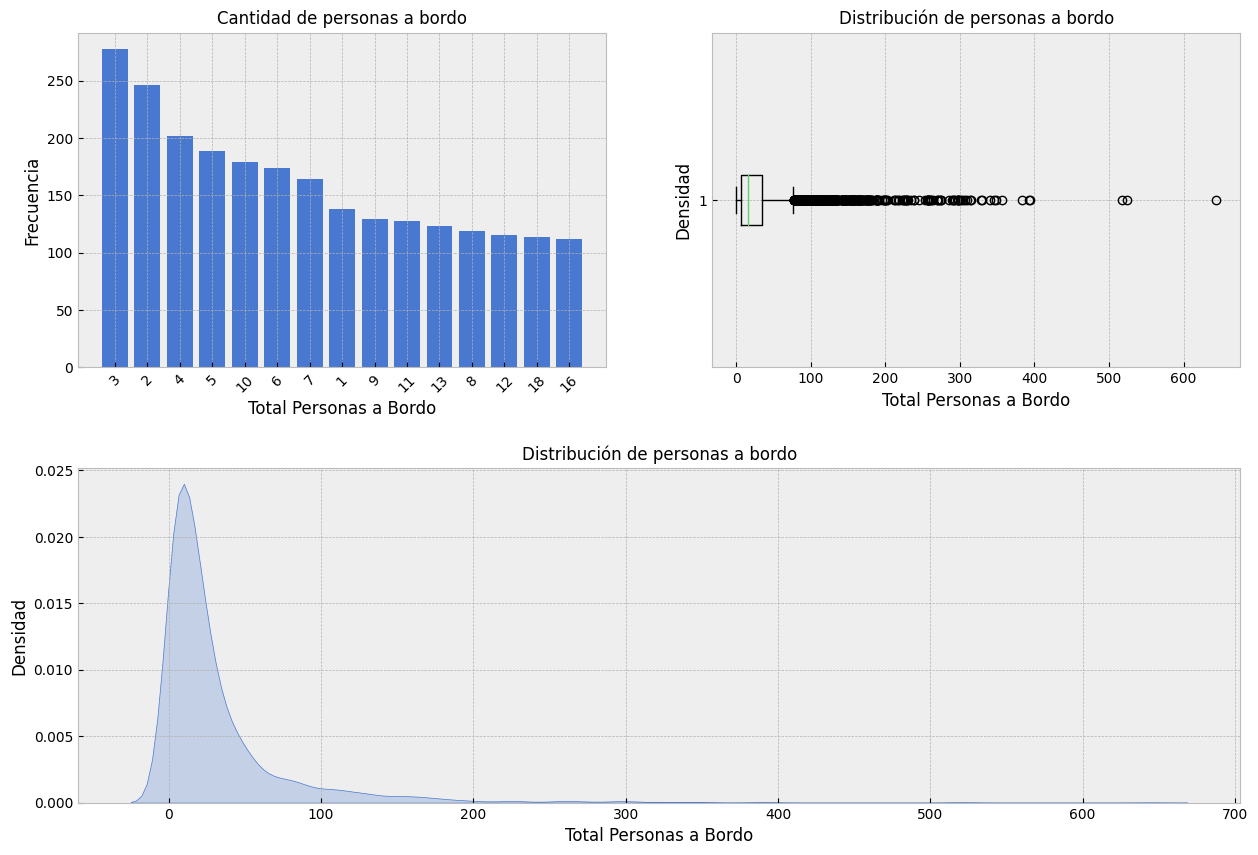

In [ ]:
freq_tipe_aboard = df_acci_copy['Total Personas a Bordo'].value_counts()

# Obtiene los tipos más frecuentes
type_freq_aboard = freq_tipe_aboard.head(15)

fig = plt.figure(figsize=(15, 10))
plt.style.use('seaborn-muted')
gs = fig.add_gridspec(2, 2, hspace=0.5)

ax1 = fig.add_subplot(gs[0,0])  
ax1.bar(type_freq_aboard.index, type_freq_aboard.values)
ax1.set_xlabel('Total Personas a Bordo')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Cantidad de personas a bordo', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(gs[0, 1])  
ax2.boxplot(df_acci_copy['Total Personas a Bordo'].astype(float), vert=False)
ax2.set_xlabel('Total Personas a Bordo')
ax2.set_ylabel('Densidad')
ax2.set_title('Distribución de personas a bordo', loc='center', fontsize=12)


ax3 = fig.add_subplot(gs[1, :])  
sns.kdeplot(df_acci_copy['Total Personas a Bordo'].astype(float), ax=ax3, fill=True)
ax3.set_xlabel('Total Personas a Bordo')
ax3.set_ylabel('Densidad')
ax3.set_title('Distribución de personas a bordo', loc='center', fontsize=12)

# Ajustamos el espaciado vertical.
gs.update(hspace=0.3)

plt.tight_layout()
plt.show()

Vamos a aplicar el metodo del rango intercuartil para detectar outliers y eliminarlos.

In [ ]:
# Calcula el rango intercuartil (IQR) para la columna "Total Personas a Bordo"
q1 = df_acci_copy['Total Personas a Bordo'].astype(float).quantile(0.25)
q3 = df_acci_copy['Total Personas a Bordo'].astype(float).quantile(0.75)
iqr = q3 - q1

# Define un umbral multiplicativo (por ejemplo, 1.5)
umbral = 1.5

# Calcula los límites superior e inferior
limite_superior = q3 + (umbral * iqr)
limite_inferior = q1 - (umbral * iqr)

# Filtra los datos para excluir los outliers
df_sin_outliers_TPB = df_acci_copy[(df_acci_copy['Total Personas a Bordo'].astype(float) >= limite_inferior) & (df_acci_copy['Total Personas a Bordo'].astype(float) <= limite_superior)]

Graficamos ahora después de haber eliminado outliers.

C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\2310901622.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')
C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\2310901622.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


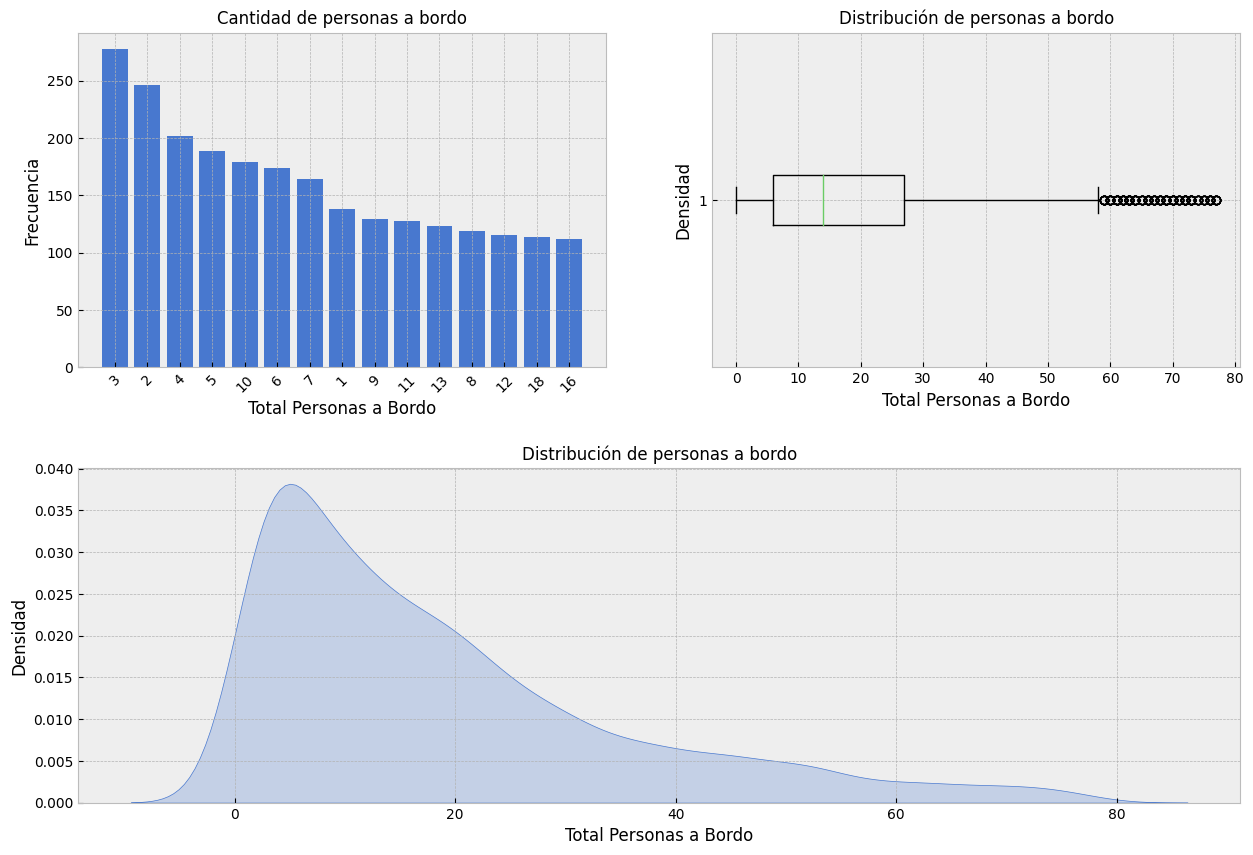

In [ ]:
freq_tipe_aboard = df_sin_outliers_TPB['Total Personas a Bordo'].value_counts()

# Obtiene los tipos más frecuentes
type_freq_aboard = freq_tipe_aboard.head(15)

fig = plt.figure(figsize=(15, 10))
plt.style.use('seaborn-muted')
gs = fig.add_gridspec(2, 2, hspace=0.5)

ax1 = fig.add_subplot(gs[0,0])  
ax1.bar(type_freq_aboard.index, type_freq_aboard.values)
ax1.set_xlabel('Total Personas a Bordo')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Cantidad de personas a bordo', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(gs[0, 1])  
ax2.boxplot(df_sin_outliers_TPB['Total Personas a Bordo'].astype(float), vert=False)
ax2.set_xlabel('Total Personas a Bordo')
ax2.set_ylabel('Densidad')
ax2.set_title('Distribución de personas a bordo', loc='center', fontsize=12)

ax3 = fig.add_subplot(gs[1, :])  
sns.kdeplot(df_sin_outliers_TPB['Total Personas a Bordo'].astype(float), ax=ax3, fill=True)
ax3.set_xlabel('Total Personas a Bordo')
ax3.set_ylabel('Densidad')
ax3.set_title('Distribución de personas a bordo', loc='center', fontsize=12)

# Ajustamos el espaciado vertical.
gs.update(hspace=0.3)

plt.tight_layout()
plt.show()

Vamos a graficar ahora la cantidad de fallecidos

C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\841552681.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')
C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\841552681.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


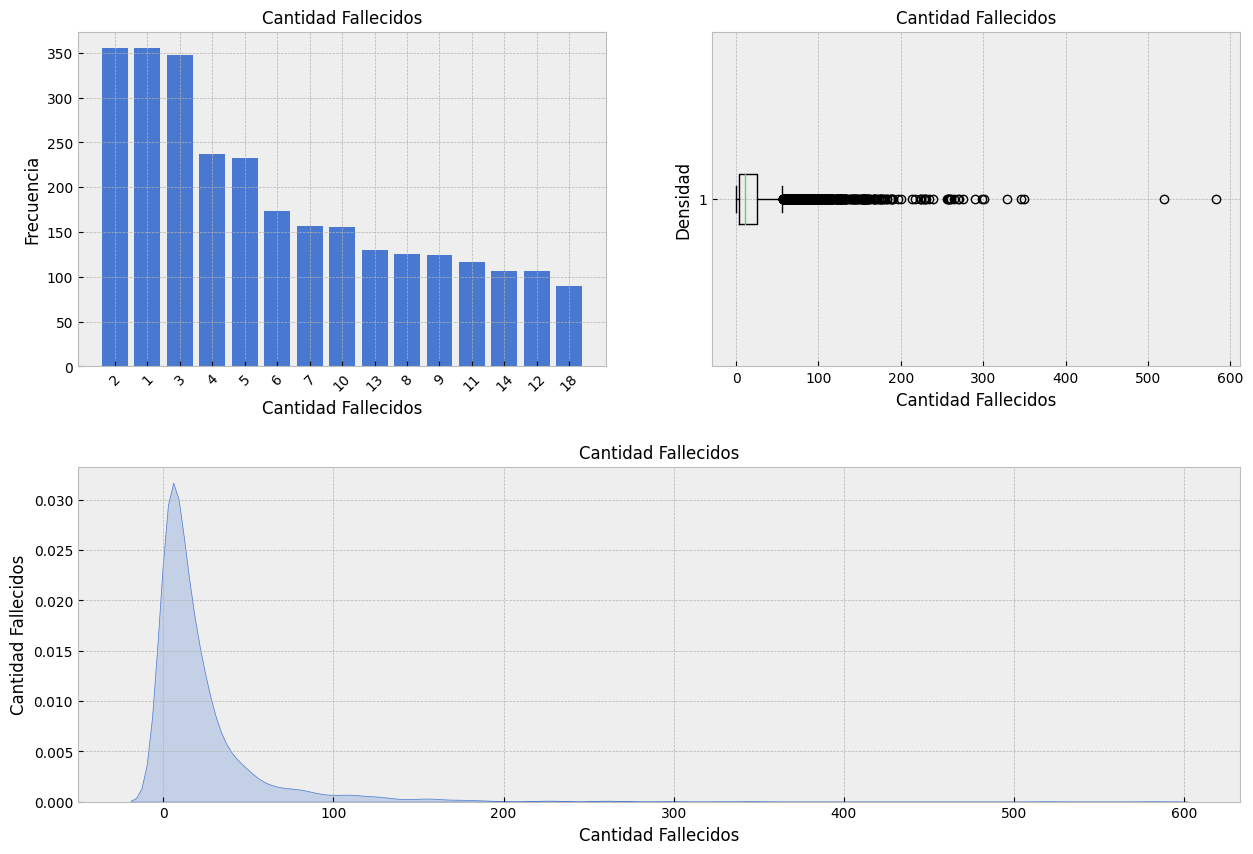

In [ ]:
freq_tipe_falle = df_sin_outliers_TPB['Cantidad Fallecidos'].value_counts()

# Obtiene los tipos más frecuentes
type_freq_falle = freq_tipe_falle.head(15)

fig = plt.figure(figsize=(15, 10))
plt.style.use('seaborn-muted')
gs = fig.add_gridspec(2, 2, hspace=0.5)

ax1 = fig.add_subplot(gs[0,0])  
ax1.bar(type_freq_falle.index, type_freq_falle.values)
ax1.set_xlabel('Cantidad Fallecidos')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Cantidad Fallecidos', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(gs[0, 1])  
ax2.boxplot(df_acci_copy['Cantidad Fallecidos'].astype(float), vert=False)
ax2.set_xlabel('Cantidad Fallecidos')
ax2.set_ylabel('Densidad')
ax2.set_title('Cantidad Fallecidos', loc='center', fontsize=12)

ax3 = fig.add_subplot(gs[1, :])  
sns.kdeplot(df_acci_copy['Cantidad Fallecidos'].astype(float), ax=ax3, fill=True)
ax3.set_xlabel('Cantidad Fallecidos')
ax3.set_ylabel('Cantidad Fallecidos')
ax3.set_title('Cantidad Fallecidos', loc='center', fontsize=12)

# Ajustamos el espaciado vertical.
gs.update(hspace=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Calcula el rango intercuartil (IQR) para la columna "Total Personas a Bordo"
q1 = df_acci_copy['Cantidad Fallecidos'].astype(float).quantile(0.25)
q3 = df_acci_copy['Cantidad Fallecidos'].astype(float).quantile(0.75)
iqr = q3 - q1

# Define un umbral multiplicativo (por ejemplo, 1.5)
umbral = 1.5

# Calcula los límites superior e inferior
limite_superior = q3 + (umbral * iqr)
limite_inferior = q1 - (umbral * iqr)

# Filtra los datos para excluir los outliers
df_sin_outliers_CF = df_acci_copy[(df_acci_copy['Cantidad Fallecidos'].astype(float) >= limite_inferior) & (df_acci_copy['Cantidad Fallecidos'].astype(float) <= limite_superior)]

C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\333036045.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')
C:\Users\pcdar\AppData\Local\Temp\ipykernel_18228\333036045.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


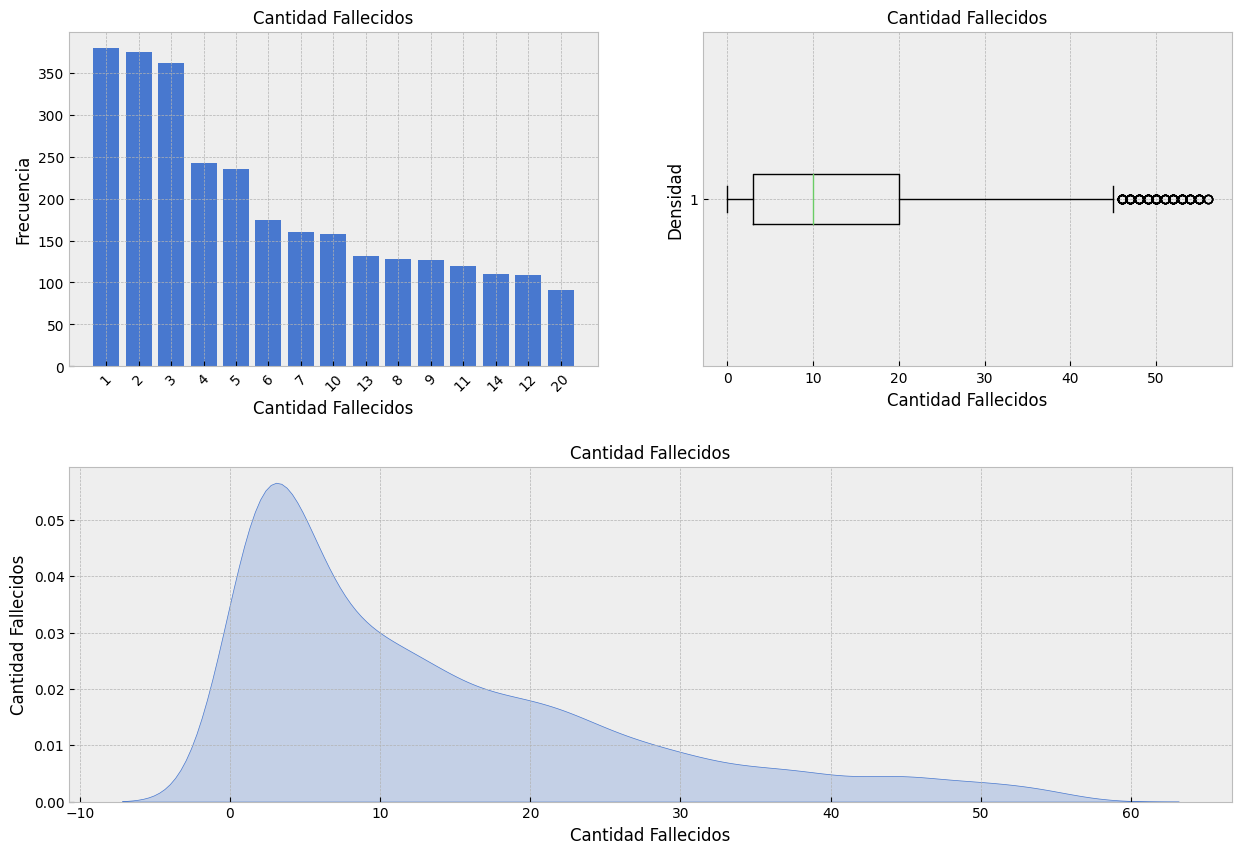

In [ ]:
freq_tipe_falle = df_sin_outliers_CF['Cantidad Fallecidos'].value_counts()

# Obtiene los tipos más frecuentes
type_freq_falle = freq_tipe_falle.head(15)

fig = plt.figure(figsize=(15, 10))
plt.style.use('seaborn-muted')
gs = fig.add_gridspec(2, 2, hspace=0.5)

ax1 = fig.add_subplot(gs[0,0])  
ax1.bar(type_freq_falle.index, type_freq_falle.values)
ax1.set_xlabel('Cantidad Fallecidos')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Cantidad Fallecidos', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(gs[0, 1])  
ax2.boxplot(df_sin_outliers_CF['Cantidad Fallecidos'].astype(float), vert=False)
ax2.set_xlabel('Cantidad Fallecidos')
ax2.set_ylabel('Densidad')
ax2.set_title('Cantidad Fallecidos', loc='center', fontsize=12)

ax3 = fig.add_subplot(gs[1, :])  
sns.kdeplot(df_sin_outliers_CF['Cantidad Fallecidos'].astype(float), ax=ax3, fill=True)
ax3.set_xlabel('Cantidad Fallecidos')
ax3.set_ylabel('Cantidad Fallecidos')
ax3.set_title('Cantidad Fallecidos', loc='center', fontsize=12)

# Ajustamos el espaciado vertical.
gs.update(hspace=0.3)

plt.tight_layout()
plt.show()

In [ ]:
columnas = ['Total Personas a Bordo', 'Pasajeros a Bordo', 'Tripulación a Bordo', 'Cantidad Fallecidos', 'Pasajeros Fallecidos', 'Tripulación Fallecida']  # Lista de nombres de las columnas a procesar

for columna in columnas:
    q1 = df_acci_copy[columna].astype(float).quantile(0.25)
    q3 = df_acci_copy[columna].astype(float).quantile(0.75)
    iqr = q3 - q1
    
    umbral = 1.5
    
    limite_superior = q3 + (umbral * iqr)
    limite_inferior = q1 - (umbral * iqr)
    
    df_sin_outliers = df_acci_copy[(df_acci_copy[columna].astype(float) >= limite_inferior) & (df_acci_copy[columna].astype(float) <= limite_superior)]

Vamos a analizar la cantidad de fallecidos en funcion de la cantidad de personas a bordo

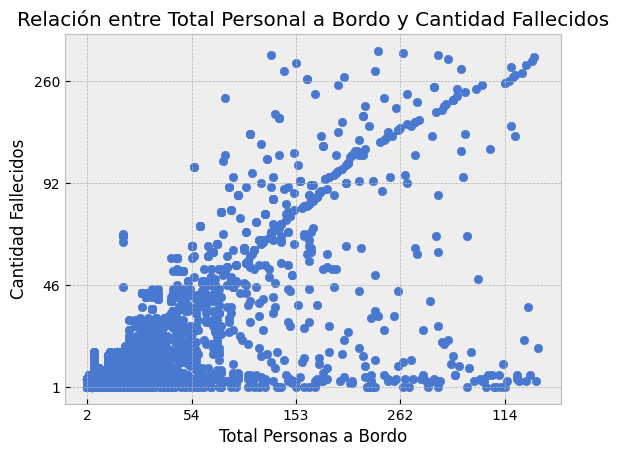

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.scatter(df_sin_outliers['Total Personas a Bordo'], df_sin_outliers['Cantidad Fallecidos'])

# Etiquetas de los ejes
plt.xlabel('Total Personas a Bordo')
plt.ylabel('Cantidad Fallecidos')
plt.title('Relación entre Total Personal a Bordo y Cantidad Fallecidos')

# Ajuste automático de etiquetas en el eje x cada 100 unidades
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50))

# Ajuste automático de etiquetas en el eje y cada 100 unidades
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=50))

# Mostrar el gráfico
plt.show()

En el grafico anterior se observa una relación lineal entre ambas variables. Vamos a generar una matriz de correlación de pearson para poder observar bien esto.

In [ ]:
data = df_acci_copy[['Total Personas a Bordo', 'Pasajeros a Bordo', 'Tripulación a Bordo', 'Cantidad Fallecidos', 'Pasajeros Fallecidos', 'Tripulación Fallecida', 'Muertos en Tierra']].astype(float)

In [ ]:
data.describe()

,Total Personas a Bordo,Pasajeros a Bordo,Tripulación a Bordo,Cantidad Fallecidos,Pasajeros Fallecidos,Tripulación Fallecida,Muertos en Tierra
count,4981.000000,4780.000000,4782.000000,4981.000000,4763.000000,4764.000000,4950.000000
mean,31.164224,26.910042,4.520494,22.347119,18.973756,3.588581,1.721212
std,45.514691,44.058901,3.754980,35.053822,34.092746,3.172407,55.573789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


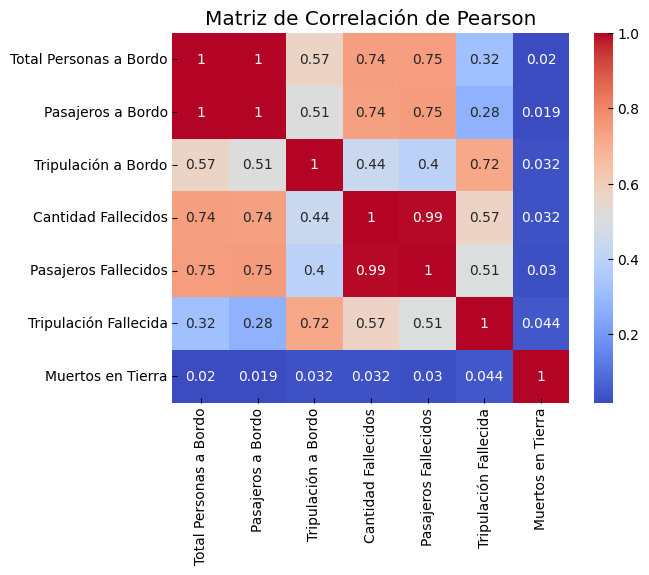

In [ ]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Pearson')
plt.show()

Observamos una alta correlación entre las variables "Total Personas a Bordo", "Pasajeros a Bordo" y "Cantidad Fallecidos", incluso se puede presentar una redundancia. Por su parte los muertos en tierra tienen una baja correlacion con todas las variables. Vamos a generar un pairplot para poder observarlo graficamente.

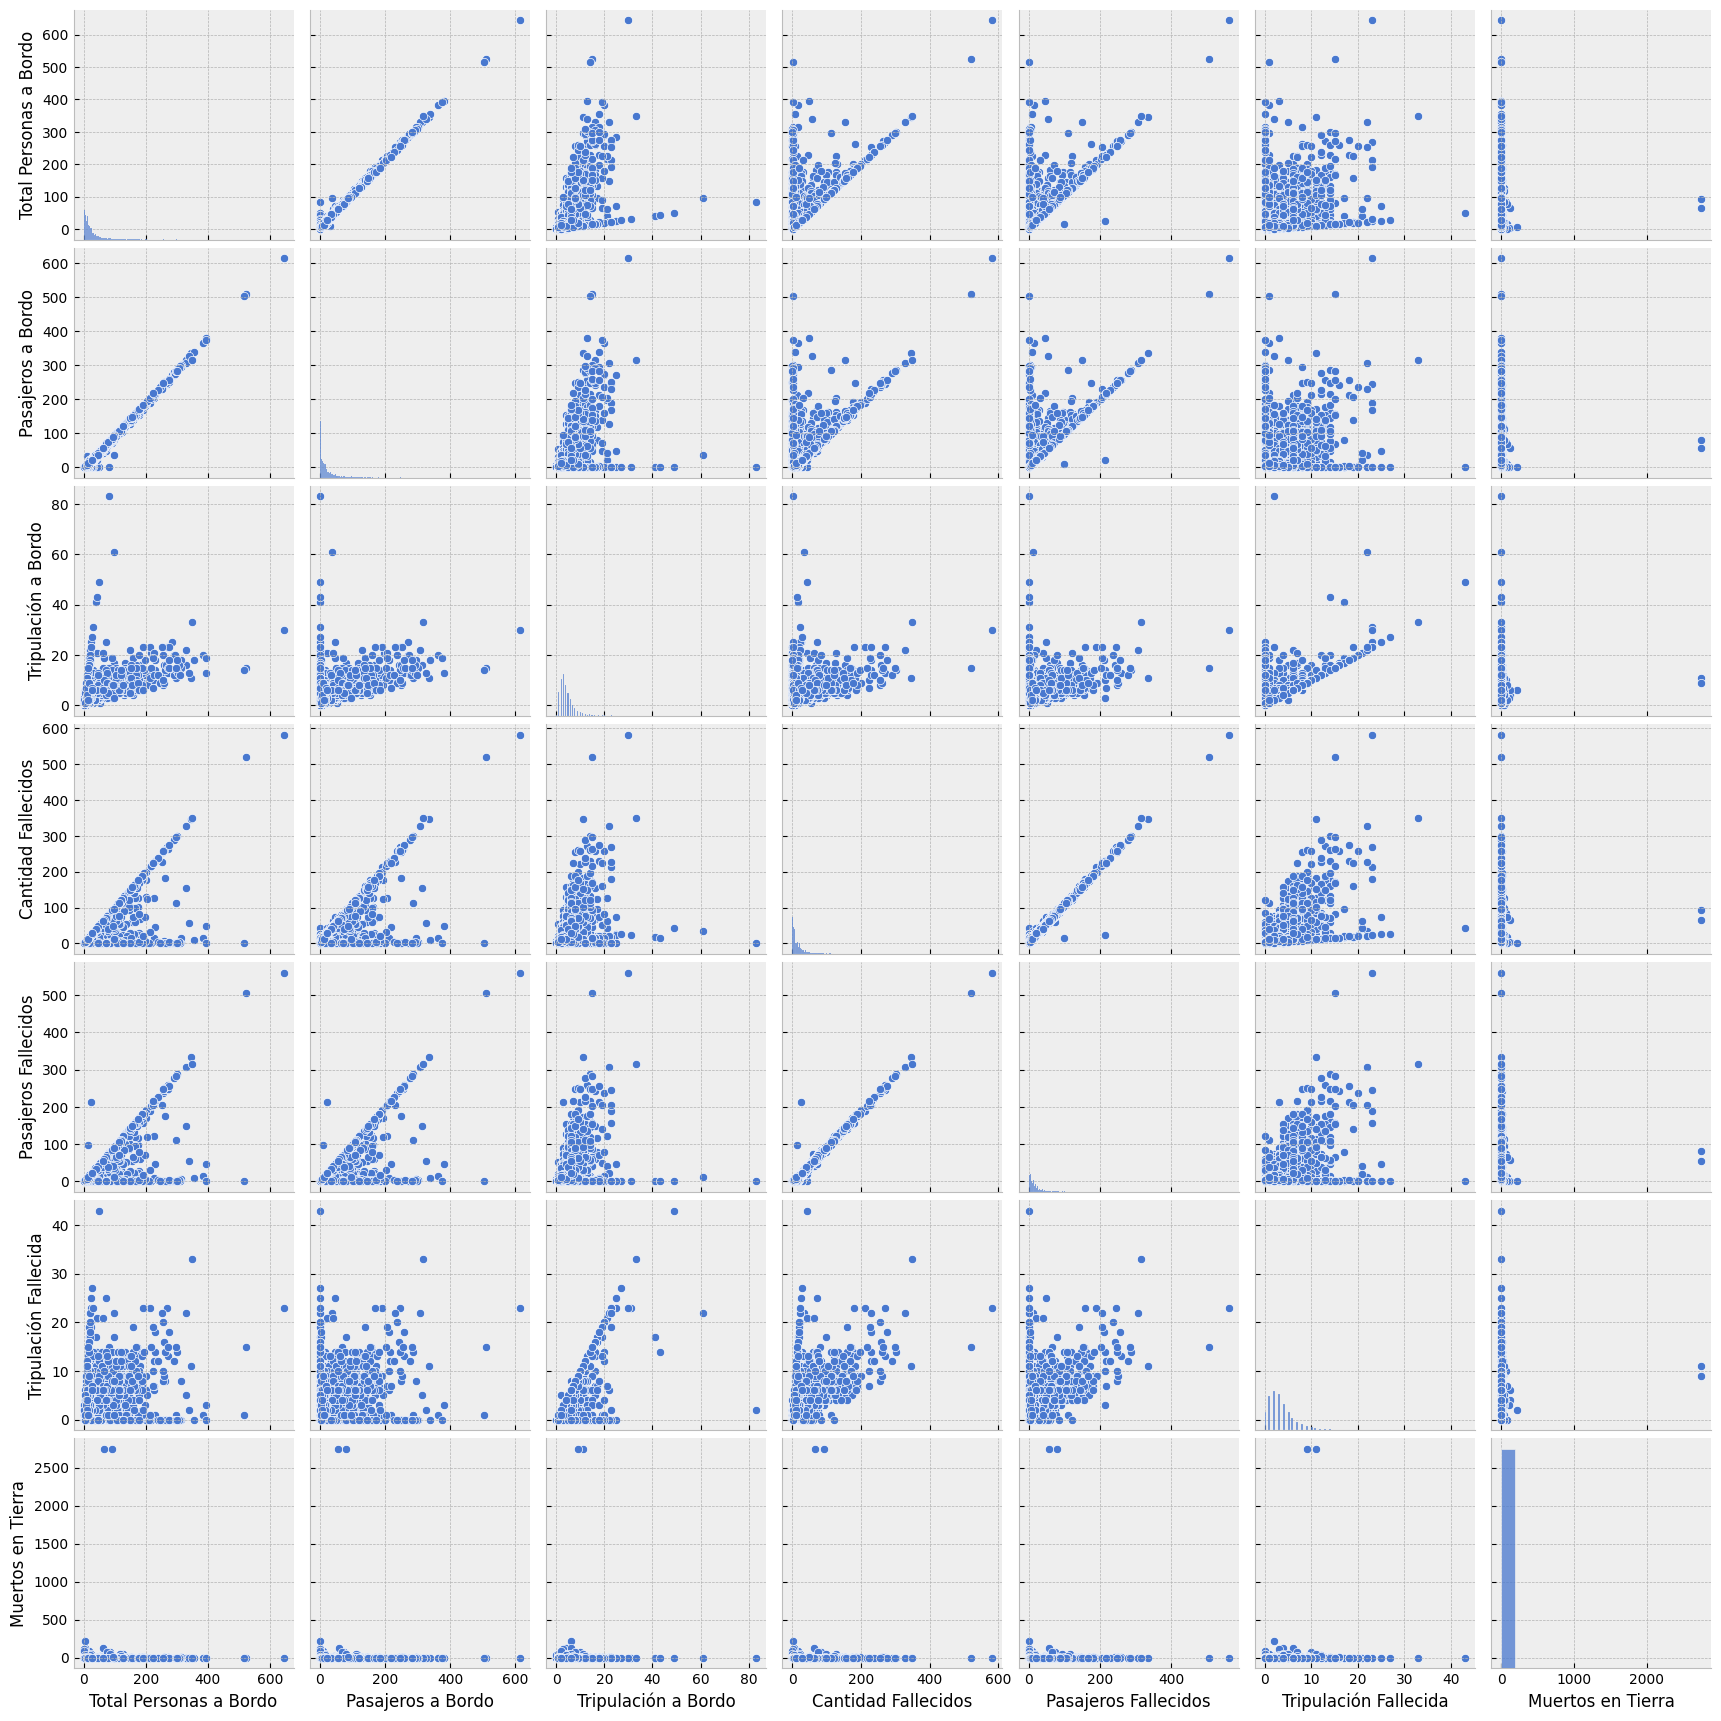

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data.corr()>0.5

,Total Personas a Bordo,Pasajeros a Bordo,Tripulación a Bordo,Cantidad Fallecidos,Pasajeros Fallecidos,Tripulación Fallecida,Muertos en Tierra
Total Personas a Bordo,True,True,True,True,True,False,False
Pasajeros a Bordo,True,True,True,True,True,False,False
Tripulación a Bordo,True,True,True,False,False,True,False
Cantidad Fallecidos,True,True,False,True,True,True,False
Pasajeros Fallecidos,True,True,False,True,True,True,False
Tripulación Fallecida,False,False,True,True,True,True,False
Muertos en Tierra,False,False,False,False,False,False,True


In [ ]:
df_acci_copy.to_csv('Datasets/Accidentes_EDA.csv', index=False)

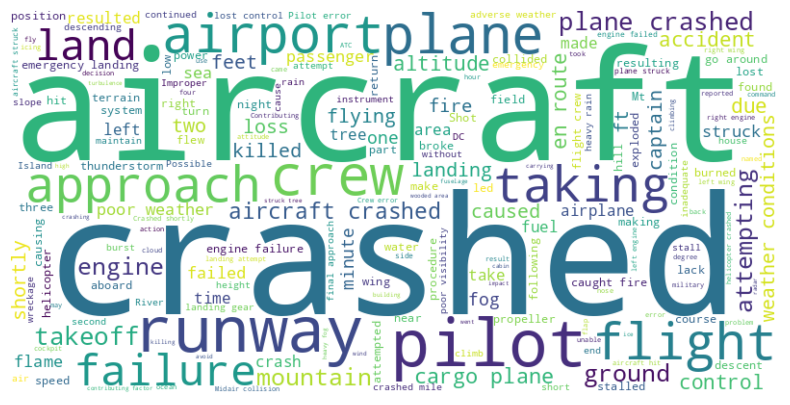

In [6]:
# Concatenar todas las descripciones en un solo texto
text = ' '.join(df_acci_copy['Resumen'].tolist())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()